In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-placement/placement-dataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv(r"/kaggle/input/college-placement/placement-dataset.csv")
dataset

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
dataset = dataset[['cgpa', 'iq', 'placement']]
dataset


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [5]:
x = dataset.iloc[:,:-1]
y = dataset["placement"]

<Axes: xlabel='cgpa', ylabel='iq'>

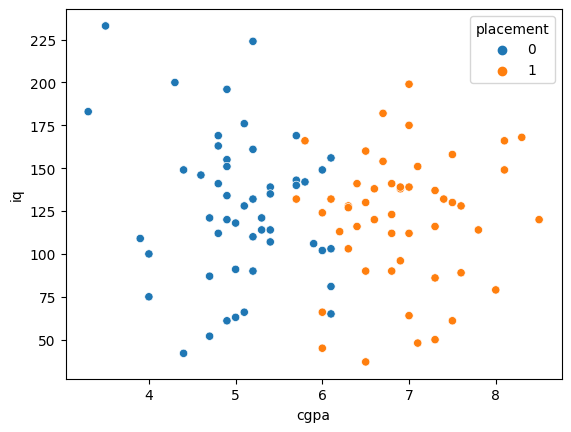

In [6]:
sns.scatterplot(x="cgpa",y="iq",data=dataset,hue="placement")

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
pf = PolynomialFeatures(degree=2)
pf.fit(x)
x = pd.DataFrame(pf.transform(x))
x.shape

(100, 6)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

In [11]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr

LogisticRegression()

In [12]:
lr.fit(x_train,y_train)

LogisticRegression()

In [13]:
lr.score(x_test,y_test)

0.85